<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/OMRClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para o treinamento das imagens foi utilizado o tutorial sugerido pelo tensorflow

https://www.tensorflow.org/tutorials/images/classification

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()


Parametros necessários para o treinamento

In [ ]:
data_dir = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasSóComBolinhas"
batch_size = 32
img_height = 250
img_width = 250

Dataset de treinamento

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=432,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 778 files belonging to 3 classes.
Using 623 files for training.


Dataset de validação

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=432,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 778 files belonging to 3 classes.
Using 155 files for validation.


Quais as classes que serão treinadas

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Fa', 'Mi', 'Re']


Algumas imagens que serão treinadas de cada classe

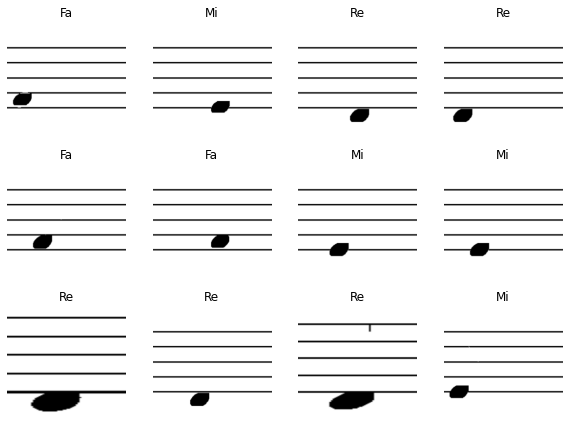

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Configuração de performance do dataset

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Normalizar os dados para ficarem menores e mais rápidos

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

Criando o modelo

In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

# model = Sequential([
#   data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

In [ ]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
20/20 [==============================] - 37s 2s/step - loss: 1.4413 - accuracy: 0.5490 - val_loss: 0.6816 - val_accuracy: 0.6774
Epoch 2/3
20/20 [==============================] - 32s 2s/step - loss: 0.1559 - accuracy: 0.9631 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/3
20/20 [==============================] - 32s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.7632e-04 - val_accuracy: 1.0000


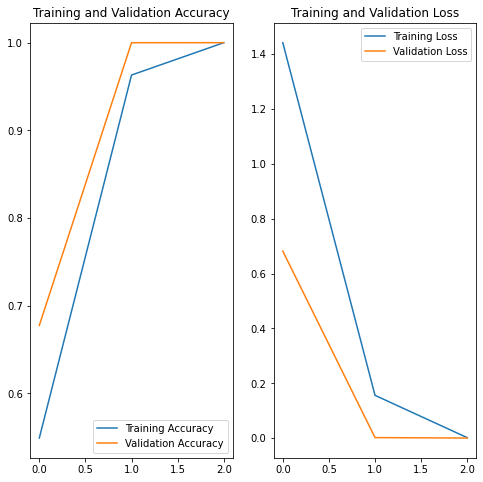

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Verificando se com o modelo treinado será identificado a nota solicitada corretamente.

This image most likely belongs to Mi with a 98.90 percent confidence.


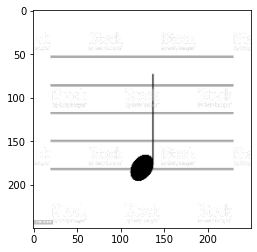

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Mi_para_reconhecer.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Re with a 86.70 percent confidence.


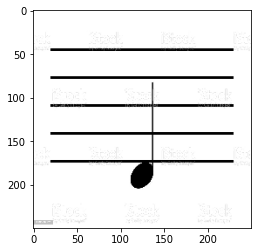

In [ ]:
# path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasRemovidas/Ré/4.png"
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Re_para_reconhecer.jpg"
img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)
plt.imshow(img)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Fa with a 99.98 percent confidence.


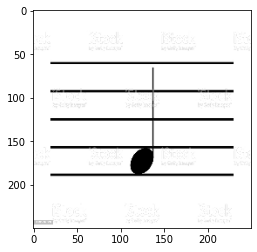

In [ ]:
# path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/NotasRemovidas/Fa/10.png"
path = "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Fa_para_reconhecer.jpg"
img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)
plt.imshow(img)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
# img = keras.preprocessing.image.load_img(
#     "/content/drive/My Drive/Colab Notebooks/ProcessamentoDeImagem/musicChords/Do_para_reconhecer.png", target_size=(img_height, img_width)
# )
# plt.imshow(img)

# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )